
## Assignment 2.2

**Problem Statement** Build a CNN for Cifar100 data

**Data:** from keras.datasets import cifar100 https://www.cs.toronto.edu/~kriz/cifar.html

**Task:**
1. Load the cifar100 data
2. Build CNN, apply adam optimizer and early stopping callback with epochs 50
3. Calculate test set accuracy score and log loss, build confusion matrix
4. Display 10 random test set cifar images with actual and predicted value (use word cifar labels)


In [7]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

### Importing data and labels

In [9]:
(training_images, training_labels), (testing_images, testing_labels) = cifar100.load_data()

In [10]:
import pandas as pd
labels = pd.read_csv(r"cifar100_labels.csv", header=None, index_col=0)

In [11]:
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [12]:
print("Shape of training images:", training_images.shape)
print("Shape of testing images:", testing_images.shape)
print("Shape of training labels:", training_labels.shape)

Shape of training images: (50000, 32, 32, 3)
Shape of testing images: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [13]:
print(np.unique(training_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [14]:
training_images.shape

(50000, 32, 32, 3)

### Visualizing training images

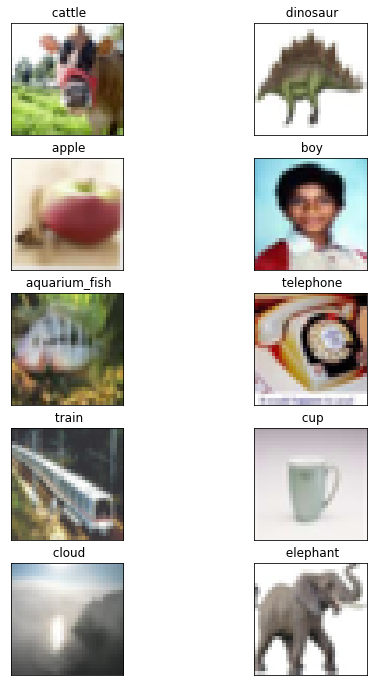

In [15]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[1][training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
#  print(training_labels[i])
plt.show()

### Normalizing images

In [16]:
training_images = training_images/255.
testing_images = testing_images/255.

### Building CNN Model

In [17]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(training_labels)), activation = 'softmax')
                             
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [20]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)

In [21]:
history = model.fit(training_images, training_labels, epochs=50, callbacks=[early_stop],
                    validation_data=(testing_images, testing_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 50s 996us/sample - loss: 3.6422 - accuracy: 0.1433 - val_loss: 3.1312 - val_accuracy: 0.2310
Epoch 2/50
50000/50000 [==============================] - 50s 999us/sample - loss: 2.9164 - accuracy: 0.2694 - val_loss: 2.7789 - val_accuracy: 0.3079
Epoch 3/50
50000/50000 [==============================] - 59s 1ms/sample - loss: 2.5896 - accuracy: 0.3378 - val_loss: 2.6594 - val_accuracy: 0.3346
Epoch 4/50
50000/50000 [==============================] - 56s 1ms/sample - loss: 2.3441 - accuracy: 0.3866 - val_loss: 2.5455 - val_accuracy: 0.3565
Epoch 5/50
50000/50000 [==============================] - 55s 1ms/sample - loss: 2.1391 - accuracy: 0.4323 - val_loss: 2.5362 - val_accuracy: 0.3641
Epoch 6/50
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.9566 - accuracy: 0.4726 - val_loss: 2.5716 - val_accuracy: 0.3746
Epoch 7/50
50000/50000 [============================

In [22]:
#model.save("dl_cifar100_model.h5")

### Model performance 

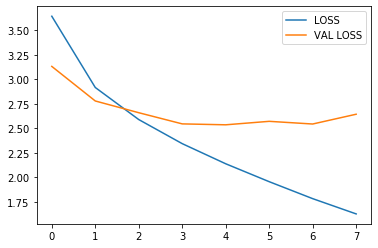

In [23]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="VAL LOSS")
plt.legend(loc='best')
plt.show()

In [24]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [25]:
print(accuracy_score(testing_labels, pred))

0.3792


In [26]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, prob))

2.6439426199248124


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(testing_labels, pred)

array([[57,  2,  1, ...,  0,  0,  1],
       [ 0, 43,  0, ...,  1,  0,  0],
       [ 1,  0, 39, ...,  0,  5,  0],
       ...,
       [ 0,  0,  2, ..., 42,  0,  0],
       [ 1,  0, 13, ...,  2,  7,  0],
       [ 0,  0,  1, ...,  0,  0, 25]], dtype=int64)

In [29]:
testing_labels = testing_labels.astype('int')

### Visualizing predictions 

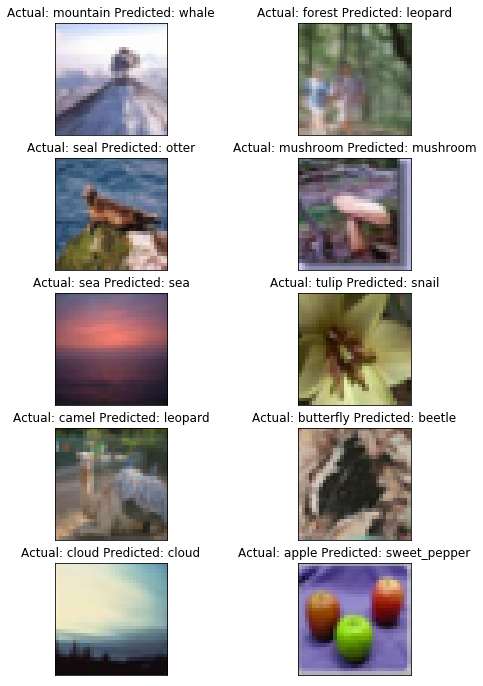

In [30]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[1][testing_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()